Setting up the apt repos

In [ ]:
!sudo apt-get update
!sudo apt-get install -y curl apt-transport-https ssl-cert ca-certificates gnupg lsb-release
!curl -1sLf 'https://dl.cloudsmith.io/public/wand/libwandio/cfg/setup/bash.deb.sh' | sudo -E bash 
!echo "deb https://pkg.caida.org/os/$(lsb_release -si|awk '{print tolower($0)}') $(lsb_release -sc) main" | sudo tee /etc/apt/sources.list.d/caida.list
!sudo wget -O /etc/apt/trusted.gpg.d/caida.gpg https://pkg.caida.org/os/ubuntu/keyring.gpg 

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://security.ubuntu.com/ubuntu bionic-security/main amd64 Packages [2,461 kB]
Hit:12 http://ppa.launchpad.net/cra

Installing the BGPStream Packages

In [ ]:
!sudo apt update; sudo apt-get install bgpstream

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 https://dl.cloudsmith.io/public/wand/libwandio/deb/ubuntu bionic InRelease [5,217 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Get:13 https://pkg.caida.org/os/ubuntu bionic 

In [ ]:
!pip install pybgpstream

  Created wheel for pybgpstream: filename=pybgpstream-2.0.2-cp37-cp37m-linux_x86_64.whl size=52824 sha256=db7b63ea7b4a90d8fe6551184607b009ec22bc1fda6c883561c55553c69a7c22
  Stored in directory: /root/.cache/pip/wheels/e8/89/78/ff40237783b034c4492a7f3b5bfb9f5787a6f4d662ab45c6fe
Successfully built pybgpstream


Testing the code out

In [ ]:
import pybgpstream
import pandas as pd


stream = pybgpstream.BGPStream(
    from_time="2017-04-26 00:00:00", until_time="2017-04-26 10:00:00 UTC",
    collectors=["rrc00"],
    record_type="updates",
)

# record_type = updates or RIBS (routing information base (RIB), is a data table stored in a router or a network host that lists the routes to particular network destinations)
"""
for elem in stream:
   # record fields can be accessed directly from elem
   # e.g. elem.time
   # or via elem.record
   # e.g. elem.record.time
   print(elem)
"""

updates = []

for elem in stream:
  update_array = [elem.time, elem.peer_asn, elem.peer_address]
  # print(update_array), element time is in int
  updates.append(update_array)

update_df = pd.DataFrame(updates, columns=['Time', 'Peer ASN', 'Peer Address'])
# Idk what the column prefixes are here for the PyBGPStream class that will be relevant, so these are the three classes that I am taking for now
# I am trying to plot a graph that shows the number of updates per normal
# I will make a separate class once the project objective has been defined
update_df["Time"] = pd.to_numeric(update_df["Time"], downcast="integer")
# update_df

this is of the type:
record_type | type | time | project | collector | router | router_ip | peer_asn | peer_address | maybe_field(prefix) | maybe_field(nexthop) | maybe_field(as-path) | communities | old-state | new-state


I am grouping the updates by time in this one.

In [ ]:
update_df.sort_values(["Time"])

updateCount = update_df["Time"].value_counts()

In [ ]:
df_2=pd.DataFrame({'Time':updateCount.index, 'frequency':updateCount.values})
sortedUpdateCount = df_2.sort_values("Time")
# sortedUpdateCount

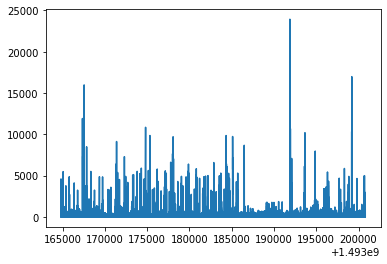

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sortedUpdateCount["Time"], sortedUpdateCount["frequency"])

In [ ]:
import pandas as pd
code_redi_df = pd.read_csv("/content/drive/MyDrive/BGP_Anomaly_Detection-main/dataset/Code_Red_I.csv")
slammer_df = pd.read_csv("/content/drive/MyDrive/BGP_Anomaly_Detection-main/dataset/Slammer.csv")
nimda_df = pd.read_csv("/content/drive/MyDrive/BGP_Anomaly_Detection-main/dataset/Nimda.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
nimda_df.shape

(8608, 42)

Combining Dataset

In [ ]:
dataset1 = pd.concat([slammer_df,nimda_df])

Upscaling Minority class for Balanced Dataset

In [ ]:
from sklearn.utils import resample

In [ ]:
df_minority = dataset1[dataset1.Label==1]
df_majority = dataset1[dataset1.Label==-1]
df_minority_upsampled = resample(df_minority, replace=True, n_samples = 12882, random_state=1)

AttributeError: ignored

Combining majority and up-scaled minority to create a balanced dataset

In [ ]:
dataset1 = pd.concat([df_minority_upsampled, df_majority])
print(dataset1.shape)
dataset1.reset_index(drop=True)

In [ ]:
X_train1 = dataset1.drop(dataset1.columns[[0,1,2,3,41]], axis=1)
Y_train1 = dataset1.iloc[:,41]
Y_train1 = [0 if ele>0 else 1 for ele in Y_train1]
Y_train1 = pd.Series(Y_train1)
X_test1 = code_redi_df.drop(code_redi_df.columns[[0,1,2,3,41]], axis=1)
Y_test1 = code_redi_df.iloc[:,41]
Y_test1 = [0 if ele>0 else 1 for ele in Y_test1]
Y_test1 = pd.Series(Y_test1)

In [ ]:
X_train1.iloc[:,0]
Y_train1
# X_train1.reset_index(drop=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import savefig

In [ ]:
plt.figure(figsize=(30,24))
sns_plot = sns.heatmap(dataset1.iloc[:,4:42].corr(method='spearman'), annot=True)
fig = sns_plot.get_figure()
fig.savefig("heatmap_corr_spearman.png")
# plt.savefig("Heat_map.png")
plt.title("Correlation Matrix for all 37 features")

MRMR

In [ ]:
mrmr_dataset = dataset1.drop(dataset1.columns[20:40], axis=1)
X_train1 = dataset1.drop(dataset1.columns[[0,1,2,3,41]], axis=1)
Y_train1 = dataset1.iloc[:,41]

In [ ]:
!pip install git+https://github.com/smazzanti/mrmr


  Cloning https://github.com/smazzanti/mrmr to /tmp/pip-req-build-w8_zpkv9
  Running command git clone -q https://github.com/smazzanti/mrmr /tmp/pip-req-build-w8_zpkv9
     |████████████████████████████████| 82 kB 305 kB/s 
  Created wheel for mrmr: filename=mrmr-0.1-py3-none-any.whl size=16139 sha256=2263918ee60e0a219ede7e1ebd772c656ed6bb70ce49620b3ee45876f2787295
  Stored in directory: /tmp/pip-ephem-wheel-cache-m4ip8sh8/wheels/97/75/f0/1af73f24fe1c223090326fd094140b43c61420a721e0ace303
Successfully built mrmr


In [ ]:
from mrmr import mrmr_classif

selected_features = mrmr_classif(X_train1, Y_train1, K = 5)
# K is the number of features to select

In [ ]:
print(selected_features)

NameError: ignored

Function to get the index of the selected features

In [ ]:
def get_index(selected_features):
  index=[]
  for i in selected_features:
    loc=X_train1.columns.get_loc(i)
    index.append(loc)
  return index

In [ ]:
get_index(selected_features)

**K fold cross validation**

In [ ]:
dataset1 = pd.concat([slammer_df,nimda_df,code_redi_df ],  ignore_index=True)
dataset1.head(10)

,Hours and Minutes,Hours,Minutes,Seconds,Number of Announcements,Number of Withdrawals,Number of announced NLRI prefixes,Number of withdrawn NLRI prefixes,Average AS-path length,Maximum AS-path length,Average Unique AS Path length,Number of Duplicate Announcements,Number of Duplicate Withdrawals,Number of Implicit Withdrawals,Average Edit Distance,Maximum Edit Distance,Inter-arrival Time,Maximum edit distance7,Maximum edit distance8,Maximum edit distance9,Maximum edit distance10,Maximum edit distance11,Maximum edit distance12,Maximum edit distance13,Maximum edit distance14,Maximum edit distance15,Maximum edit distance16,Maximum edit distance17,Maximum AS-path length7,Maximum AS-path length8,Maximum AS-path length9,Maximum AS-path length10,Maximum AS-path length11,Maximum AS-path length12,Maximum AS-path length13,Maximum AS-path length14,Maximum AS-path length15,Number of Interior Gateway Protocol (IGP) packets,Number of Exterior Gateway Protocol (EGP) packets,Number of incomplete packets,Packet size (B),Label
0,0,0,0,8,46,4,88,13,6,12,6,1,54,4,12,0.8,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,41,0,5,243,-1
1,1,0,1,4,40,4,161,28,6,8,6,27,96,0,8,0.7,5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,34,0,6,287,-1
2,2,0,2,0,59,7,133,69,6,13,6,2,103,11,13,1.1,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,55,0,4,256,-1
3,3,0,3,12,52,4,138,32,5,7,6,12,105,0,7,0.9,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,48,0,4,263,-1
4,4,0,4,9,49,2,119,24,6,9,6,1,63,0,9,0.8,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,46,0,3,252,-1
5,5,0,5,4,80,3,231,26,7,11,7,8,228,0,11,1.3,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,76,0,4,270,-1
6,6,0,6,0,43,7,126,60,6,11,6,3,67,12,11,0.8,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,42,0,1,258,-1
7,7,0,7,15,23,1,38,3,7,10,7,2,33,0,10,0.4,7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,22,0,1,222,-1
8,8,0,8,8,39,3,54,3,6,12,6,2,34,1,12,0.7,6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,35,0,4,214,-1
9,9,0,9,7,40,4,134,8,7,12,7,5,64,1,12,0.7,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,35,0,5,265,-1


In [ ]:
from numpy import array
from sklearn.model_selection import KFold
import csv

kfold = KFold( n_splits = 10 )

for train, test in kfold.split( dataset1 ):
  print(len(test))
  print(len(train))

2301
20708
2301
20708
2301
20708
2301
20708
2301
20708
2301
20708
2301
20708
2301
20708
2301
20708
2300
20709
